## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing The Dataset

In [2]:
url = "datasets/brca.csv"
data = pd.read_csv(url)

## Pre-processing Dataset

In [3]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [5]:
data = data.drop(columns=['Patient_ID'], axis=1)
data = data.drop(columns=['Date_of_Surgery'], axis=1)
data = data.drop(columns=['Date_of_Last_Visit'], axis=1)

In [6]:
print(data.isna().sum())

Age                7
Gender             7
Protein1           7
Protein2           7
Protein3           7
Protein4           7
Tumour_Stage       7
Histology          7
ER status          7
PR status          7
HER2 status        7
Surgery_type       7
Patient_Status    20
dtype: int64


In [7]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


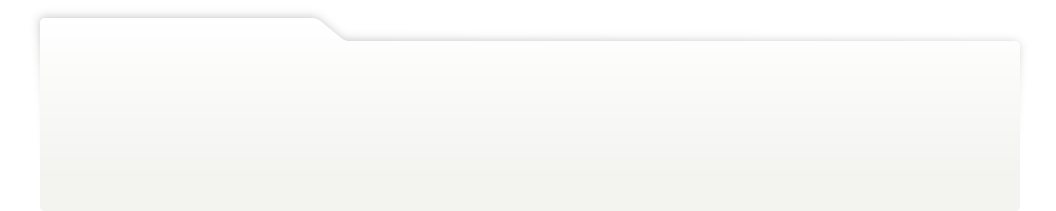
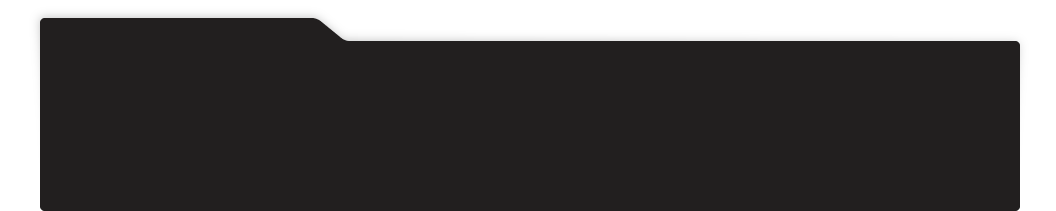
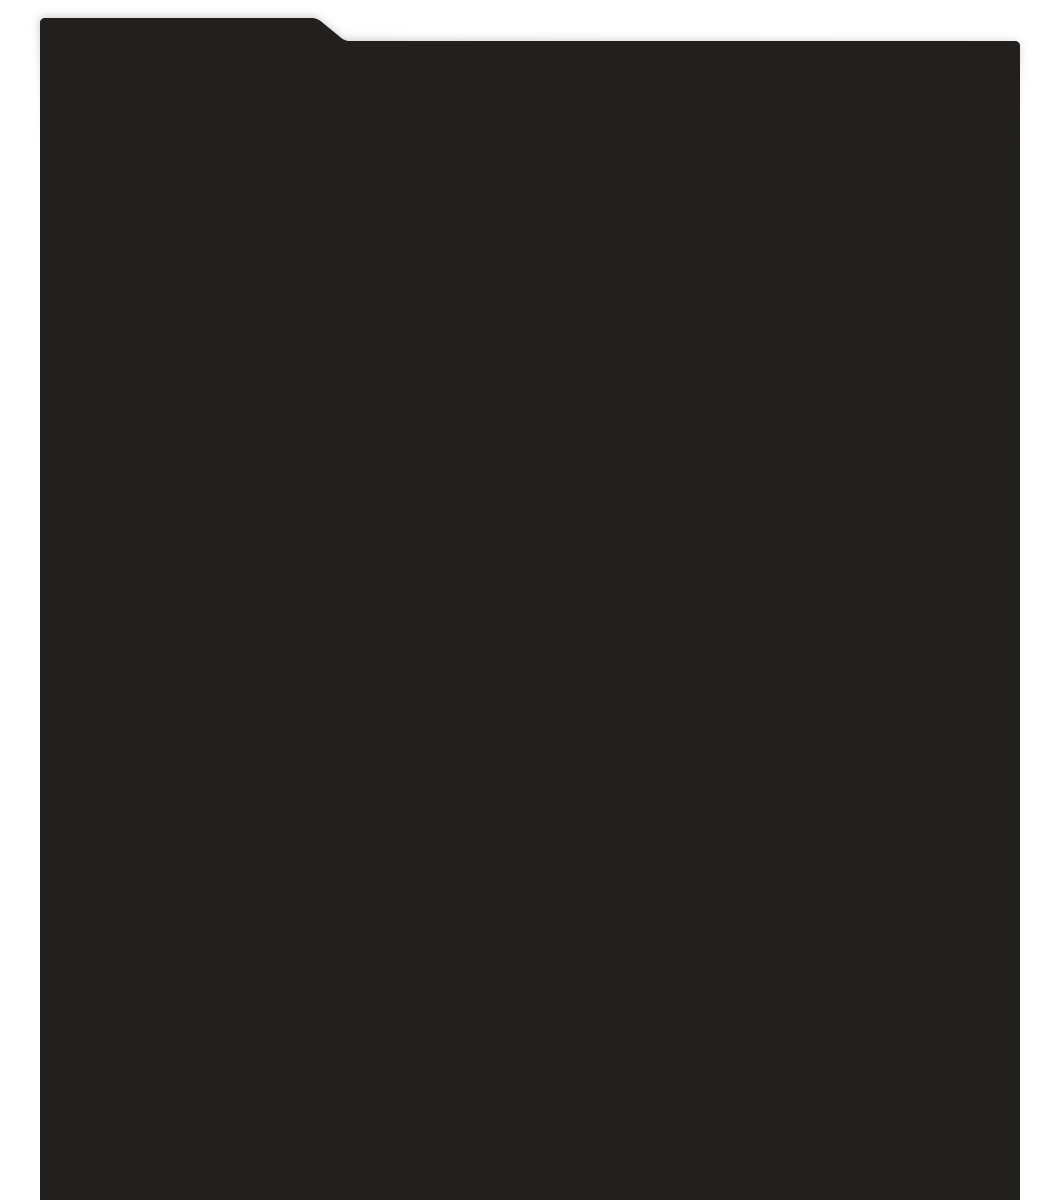
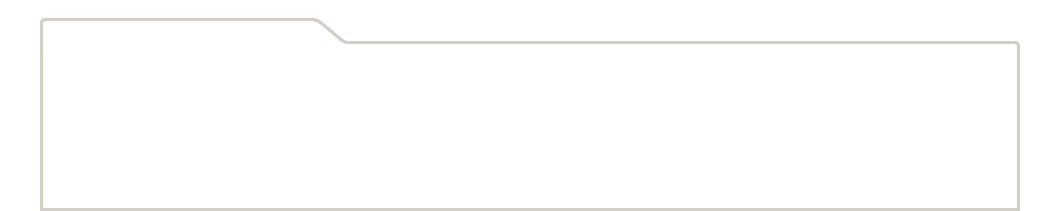
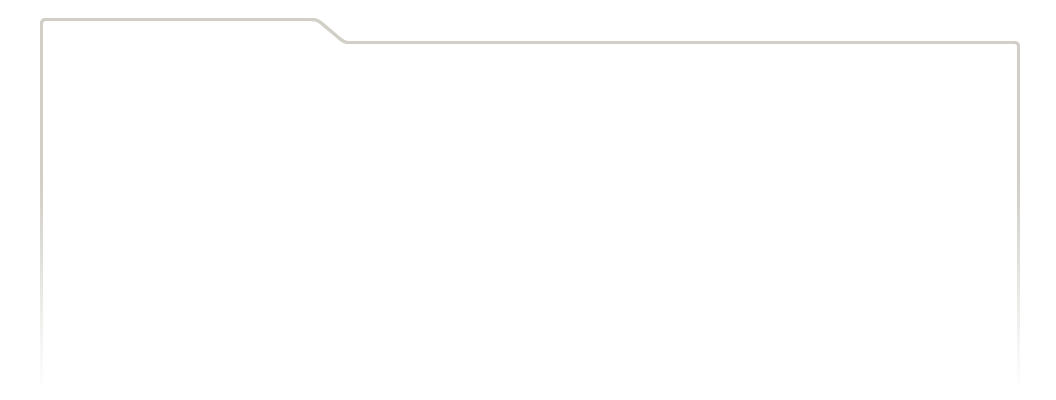
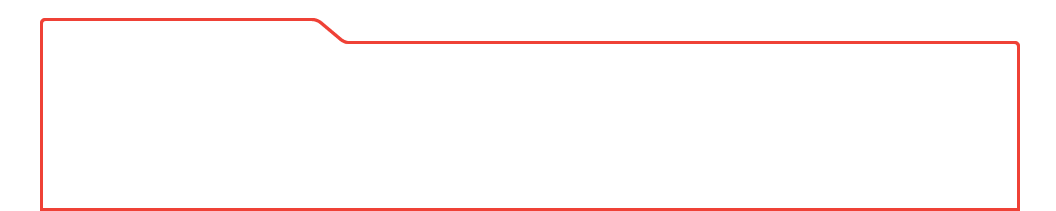
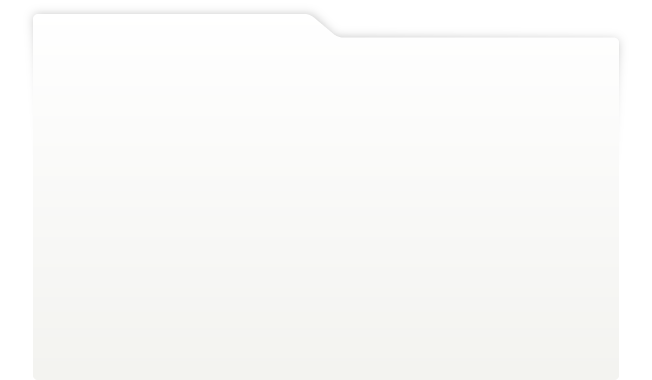
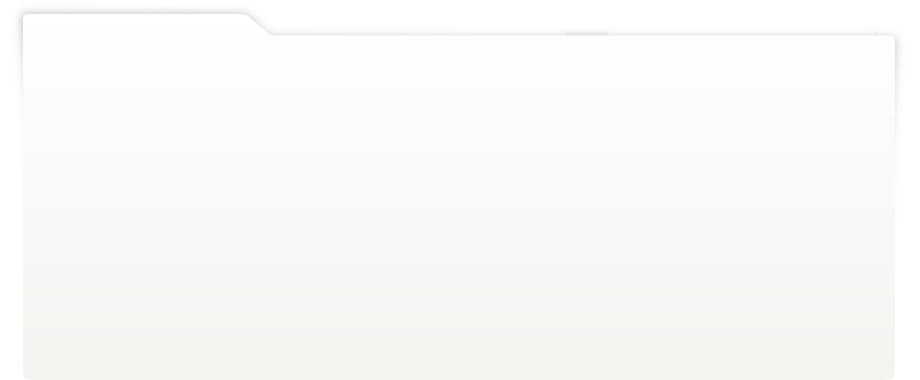
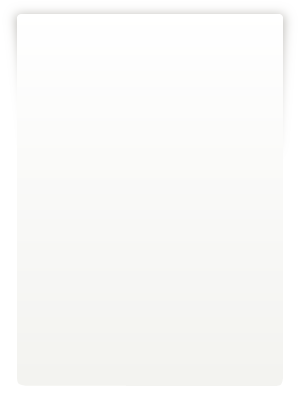
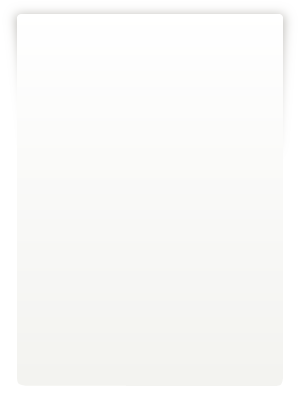
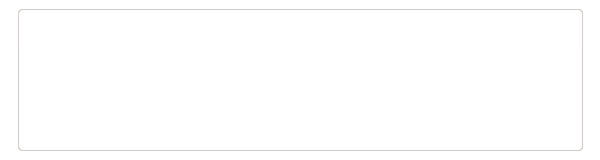
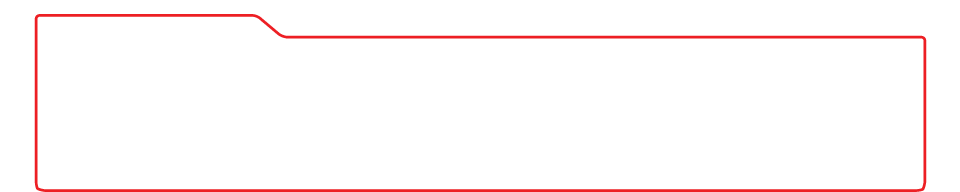
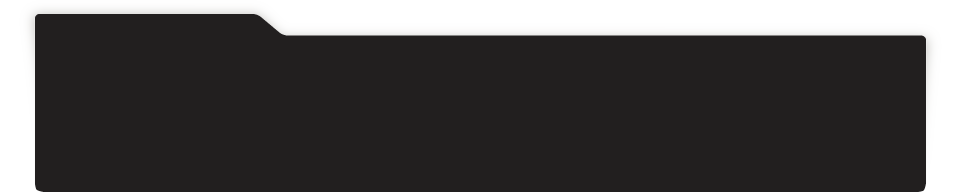
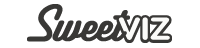
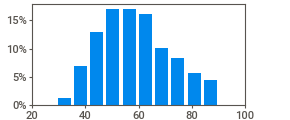
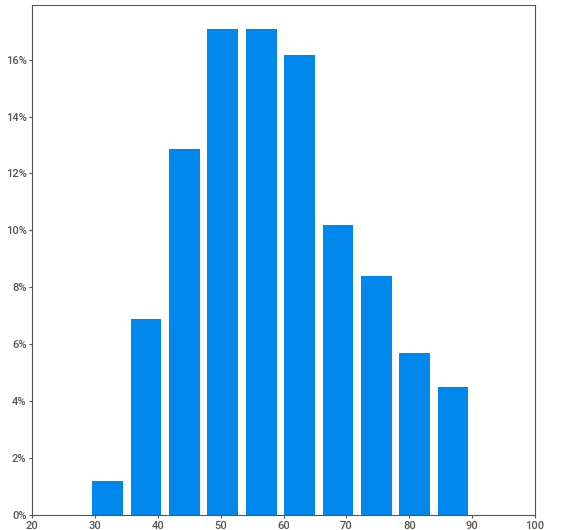
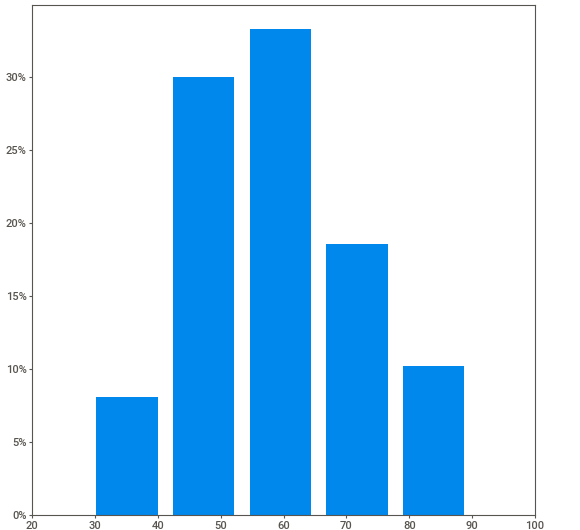
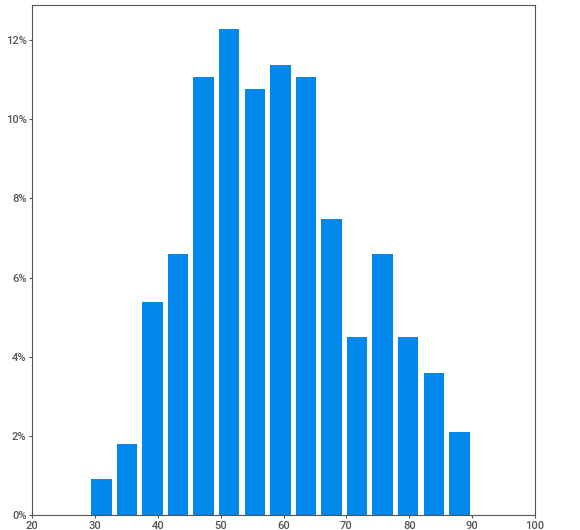
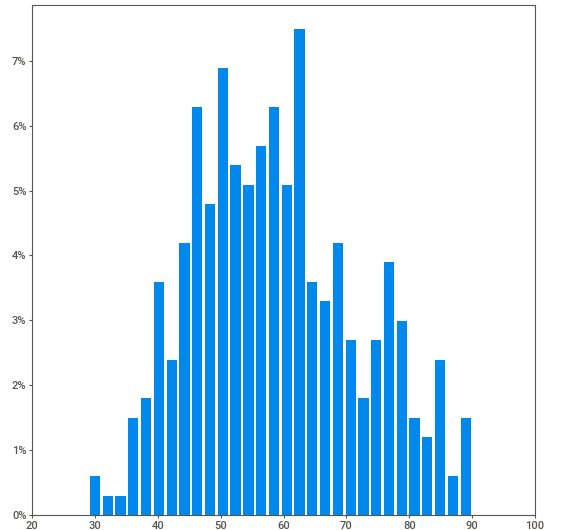
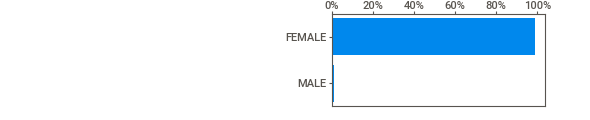
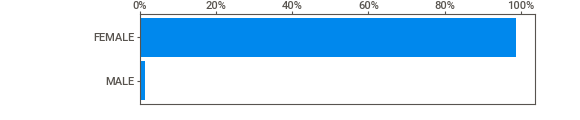
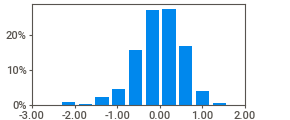
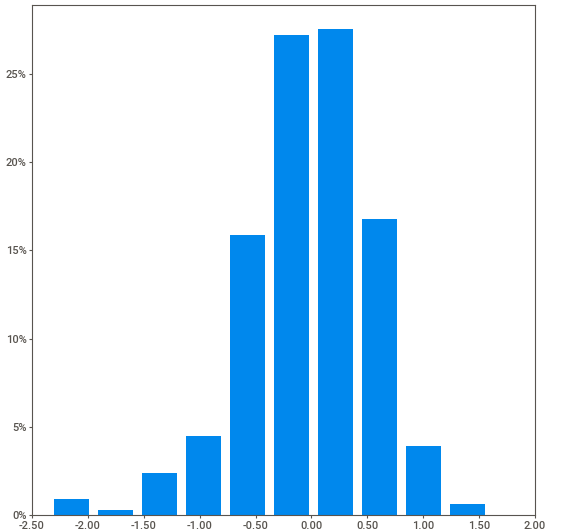
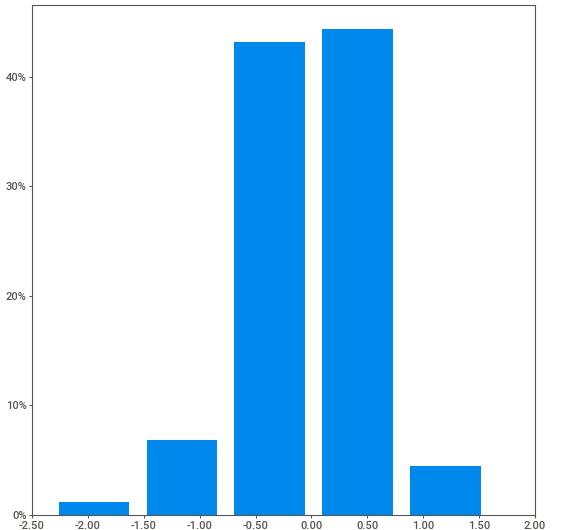
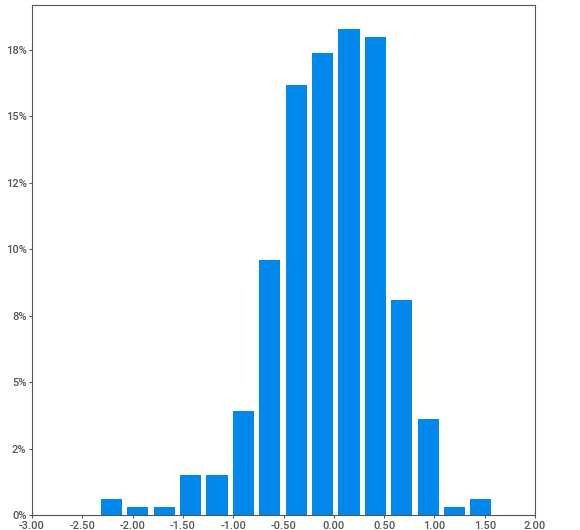
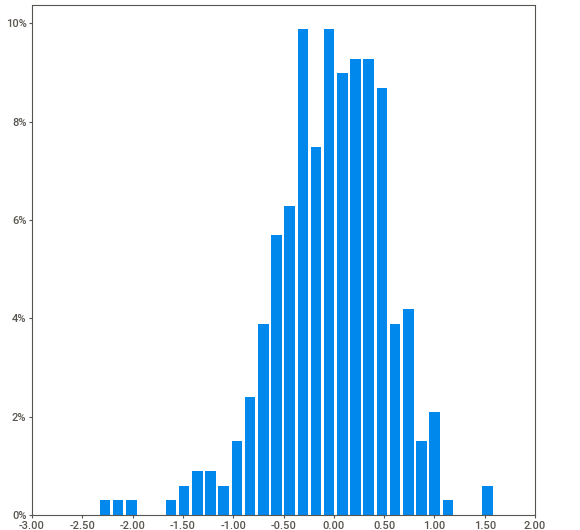
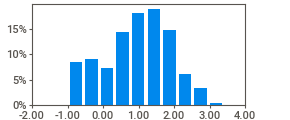
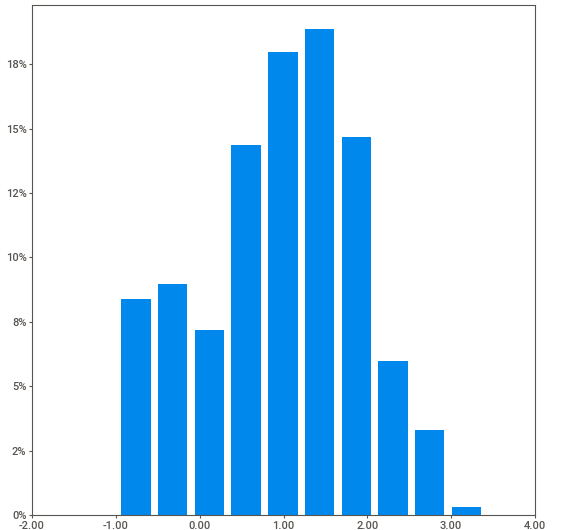
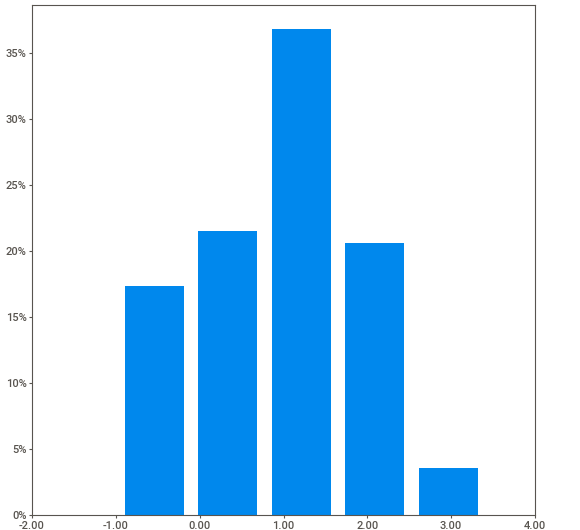
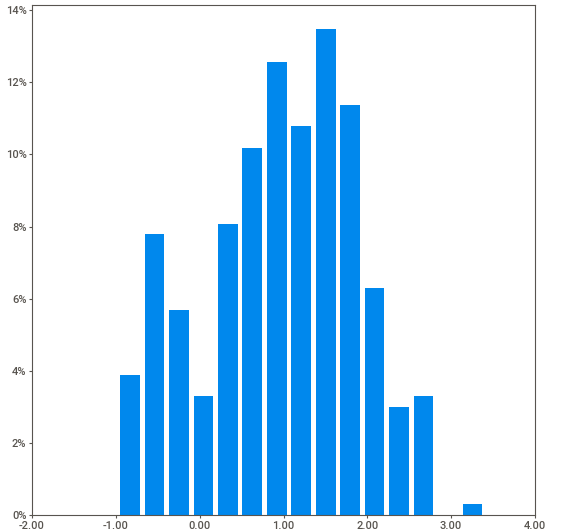
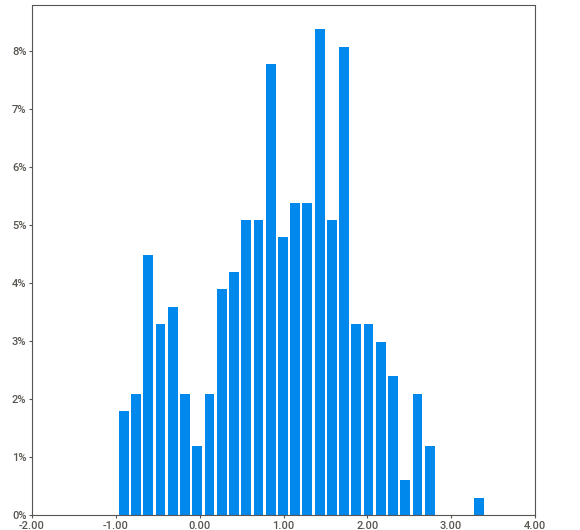
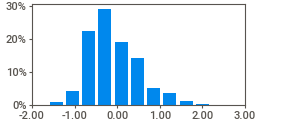
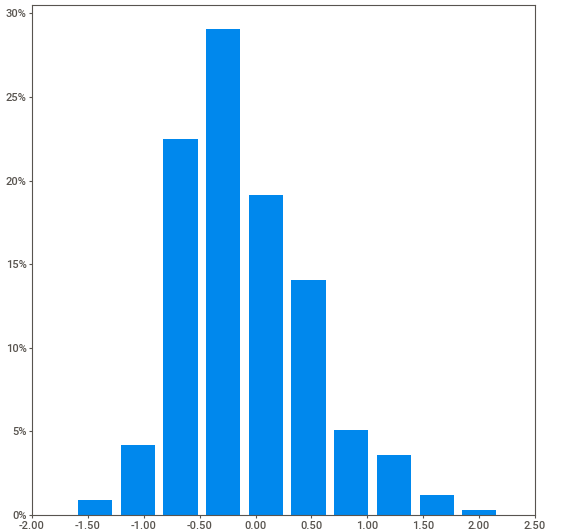
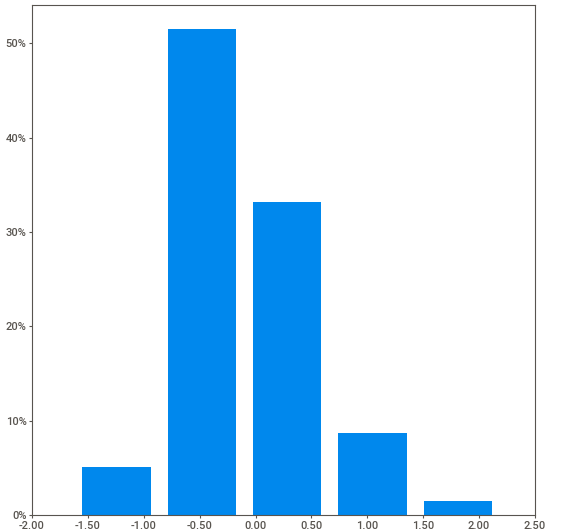
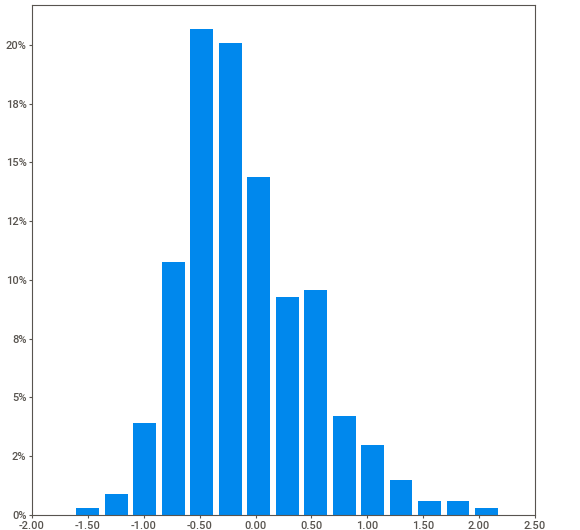
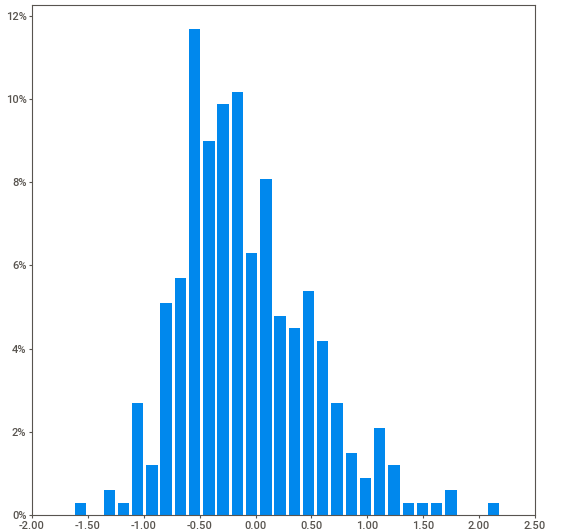
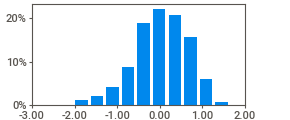
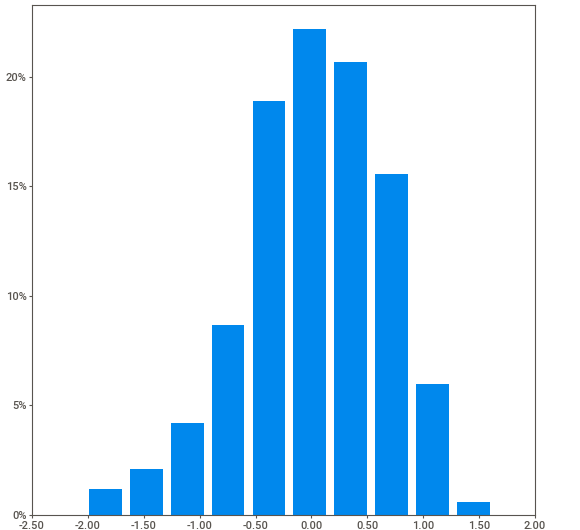
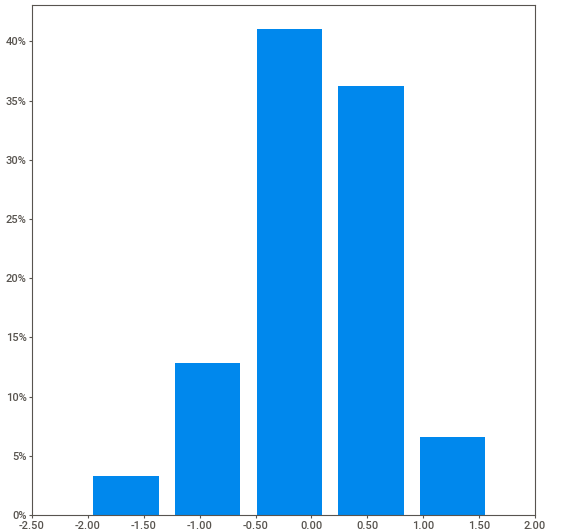
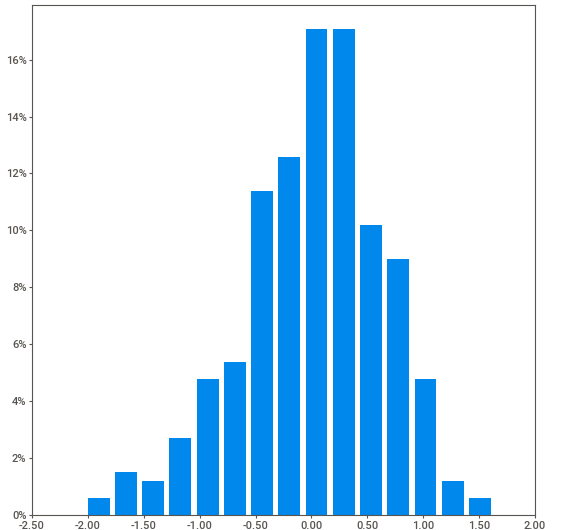
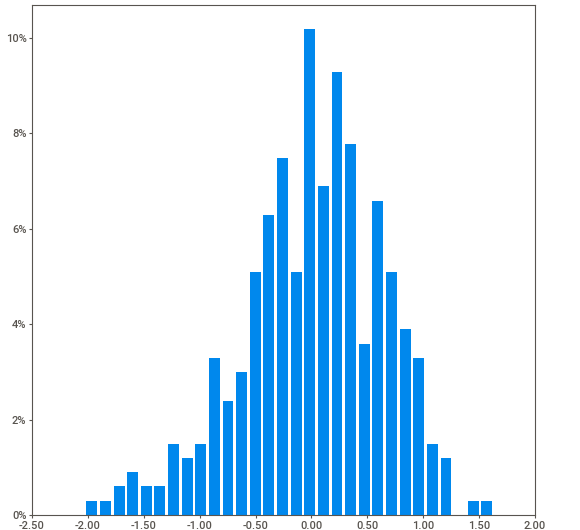
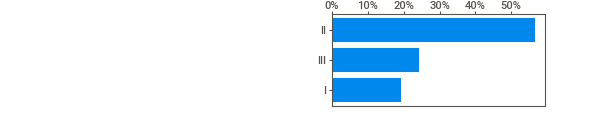
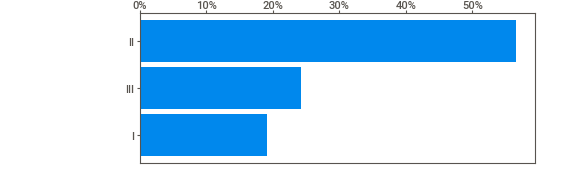
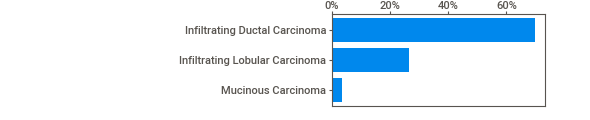
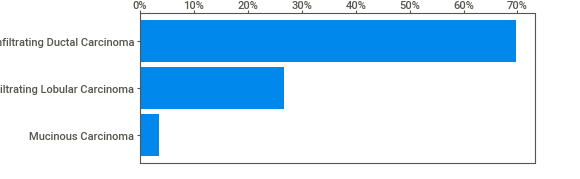
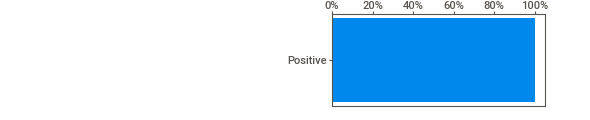
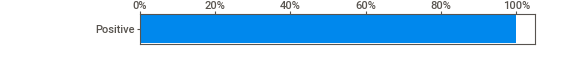
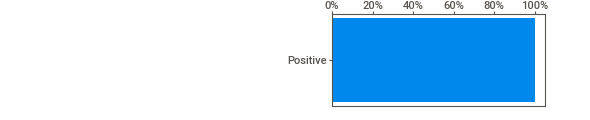
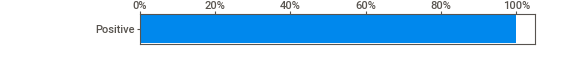
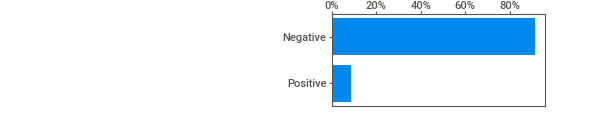
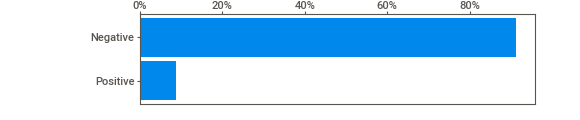
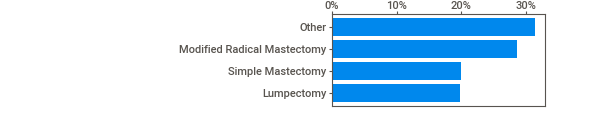
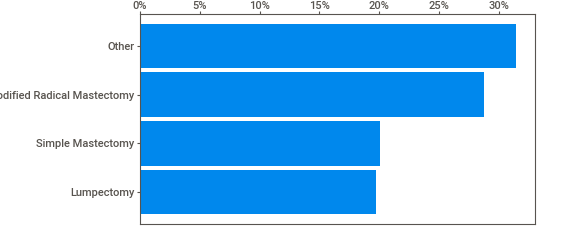
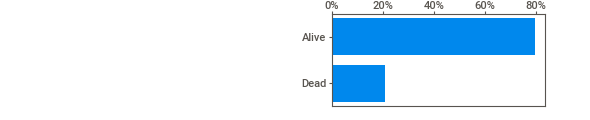
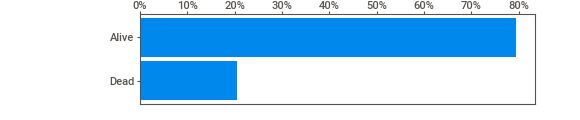
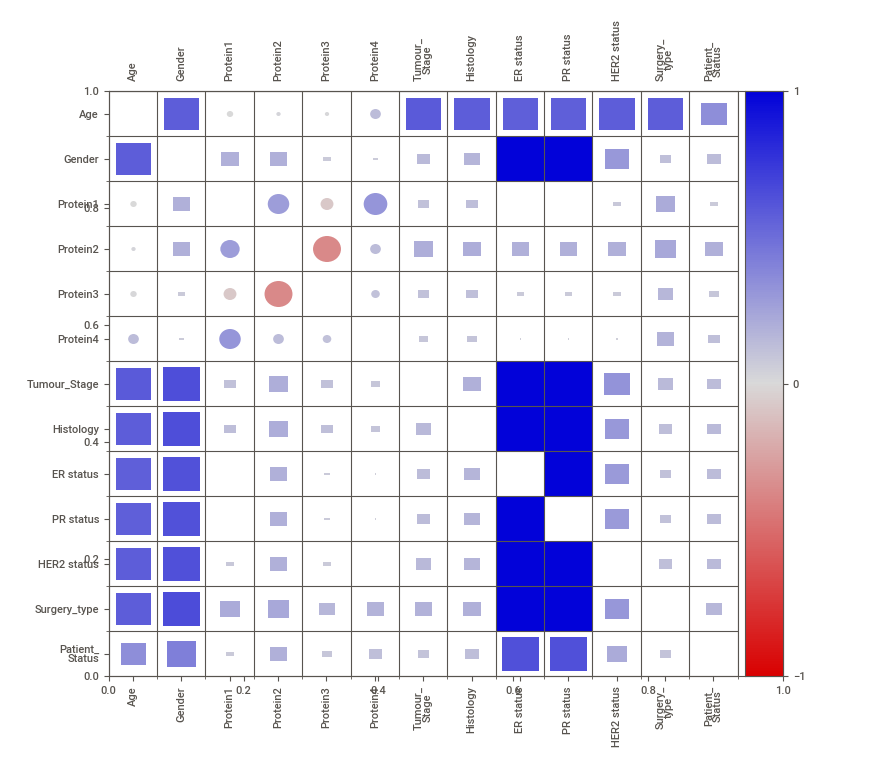
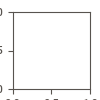

In [8]:
# Generate the report
report = sv.analyze(data)

# Visualize the report
report.show_notebook()

In [9]:
data = data.dropna()

In [10]:
print(data.isna().sum())

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64


In [11]:
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values = data[column].unique()
        print(f"Unique values in column [{column}] : {unique_values}")

Unique values in column [Gender] : ['FEMALE' 'MALE']
Unique values in column [Tumour_Stage] : ['III' 'II' 'I']
Unique values in column [Histology] : ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
Unique values in column [ER status] : ['Positive']
Unique values in column [PR status] : ['Positive']
Unique values in column [HER2 status] : ['Negative' 'Positive']
Unique values in column [Surgery_type] : ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Unique values in column [Patient_Status] : ['Alive' 'Dead']


In [14]:
data = pd.get_dummies(data, columns=['Gender','Tumour_Stage','Histology', 'HER2 status','Surgery_type'])

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['ER status'] = label_encoder.fit_transform(data['ER status'])
data['PR status'] = label_encoder.fit_transform(data['PR status'])
data['Patient_Status'] = label_encoder.fit_transform(data['Patient_Status'])

In [21]:
data.head()

,Age,Protein1,Protein2,Protein3,Protein4,ER status,PR status,Patient_Status,Gender_FEMALE,Gender_MALE,...,Tumour_Stage_III,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,36.0,0.080353,0.42638,0.54715,0.273680,0,0,0,True,False,...,True,True,False,False,True,False,False,True,False,False
1,43.0,-0.420320,0.57807,0.61447,-0.031505,0,0,1,True,False,...,False,False,False,True,True,False,True,False,False,False
2,69.0,0.213980,1.31140,-0.32747,-0.234260,0,0,0,True,False,...,True,True,False,False,True,False,False,False,True,False
3,56.0,0.345090,-0.21147,-0.19304,0.124270,0,0,0,True,False,...,False,True,False,False,True,False,False,True,False,False
4,56.0,0.221550,1.90680,0.52045,-0.311990,0,0,1,True,False,...,False,True,False,False,True,False,False,False,True,False


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 333
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       321 non-null    float64
 1   Protein1                                  321 non-null    float64
 2   Protein2                                  321 non-null    float64
 3   Protein3                                  321 non-null    float64
 4   Protein4                                  321 non-null    float64
 5   ER status                                 321 non-null    int32  
 6   PR status                                 321 non-null    int32  
 7   Patient_Status                            321 non-null    int64  
 8   Gender_FEMALE                             321 non-null    bool   
 9   Gender_MALE                               321 non-null    bool   
 10  Tumour_Stage_I                            3

In [23]:
data = data.astype(float)

## Splitting The Dataset (Base)

In [24]:
x = data.drop(columns=['Patient_Status'], axis=1).values
y = data['Patient_Status'].values
y = y.astype(int)

In [28]:
print("Type of x:", type(x))
print("Shape of x:", x.shape)
print("Data type of x elements:", x.dtype)
print("First 5 elements of x:\n", x[:5])

Type of x: <class 'numpy.ndarray'>
Shape of x: (321, 21)
Data type of x elements: float64
First 5 elements of x:
 [[ 3.6000e+01  8.0353e-02  4.2638e-01  5.4715e-01  2.7368e-01  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00
   1.0000e+00  0.0000e+00  0.0000e+00]
 [ 4.3000e+01 -4.2032e-01  5.7807e-01  6.1447e-01 -3.1505e-02  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  1.0000e+00  1.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00]
 [ 6.9000e+01  2.1398e-01  1.3114e+00 -3.2747e-01 -2.3426e-01  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00]
 [ 5.6000e+01  3.4509e-01 -2.1147e-01 -1.9304e-01  1.2427e-01  0.0000e+00
   0.0000e+00  1.0000e+00  0.

In [29]:
print("Type of y:", type(y))
print("Shape of y:", y.shape)
print("Data type of y elements:", y.dtype)
print("First 5 elements of y:\n", y[:5])

Type of y: <class 'numpy.ndarray'>
Shape of y: (321,)
Data type of y elements: int32
First 5 elements of y:
 [0 1 0 0 1]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (256, 21)
X_test shape: (65, 21)
y_train shape: (256,)
y_test shape: (65,)


In [32]:
print("\nX_train sample:")
print(X_train[:1])
print("\nX_test sample:")
print(X_test[:1])
print("\ny_train sample:")
print(y_train[:1])
print("\ny_test sample:")
print(y_test[:1])


X_train sample:
[[83.      -0.39298  1.4757   0.14378  0.64097  0.       0.       1.
   0.       1.       0.       0.       1.       0.       0.       1.
   0.       0.       0.       1.       0.     ]]

X_test sample:
[[46.       0.14483 -0.76107  0.73345  0.82384  0.       0.       1.
   0.       0.       0.       1.       1.       0.       0.       1.
   0.       0.       1.       0.       0.     ]]

y_train sample:
[0]

y_test sample:
[0]


## Train XGBoost Model On Base Dataset

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
print(f'Best XGB parameters: {best_params_xgb}')

Best XGB parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=1.0,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Base Model Evaluation (XGBoost)

In [35]:
y_pred = xgb_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.82
Precision: 0.00
Recall: 0.00
F1-score: 0.00


c:\Users\albia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


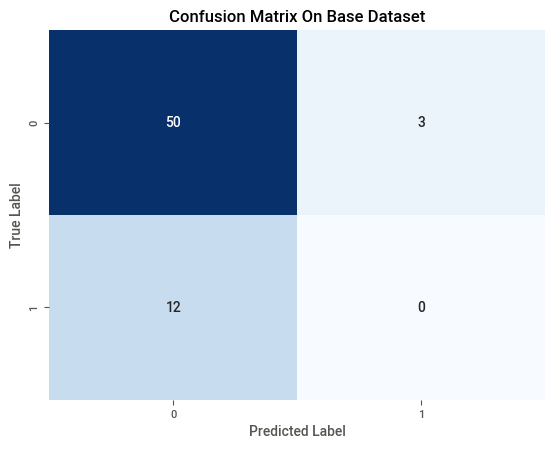

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix On Base Dataset')
plt.show()

## Scaling The Dataset

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)

In [50]:
print("\nfeatures_scaled sample:")
print(features_scaled[:1])
print("\ny sample:")
print(y[:1])


features_scaled sample:
[[-1.77193635 -0.11233119  0.19572238 -0.58156077  1.09090038  0.42615965
   1.44385878 -0.6116583   0.          0.         -0.31514293 -0.48875951]]

y sample:
[0]


## PCA

In [51]:
print("Features scaled shape:", features_scaled.shape)
print("Target shape:", y.shape)
print("Any NaN in features scaled:", np.isnan(features_scaled).any())
print("Any NaN in target:", np.isnan(y).any())

Features scaled shape: (321, 12)
Target shape: (321,)
Any NaN in features scaled: False
Any NaN in target: False


In [62]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=1.0,
    eval_metric='logloss'
)

# Definisikan pipeline dengan PCA dan XGBoost
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('xgb', xgb_model)
])

# Definisikan parameter grid untuk PCA
param_grid_pca = {
    'pca__n_components': [2, 4, 6, 8, 10, 11,12]
}

# Lakukan Grid Search dengan pipeline
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5)
grid_search_pca.fit(features_scaled, y)

# Dapatkan parameter terbaik
best_params_pca = grid_search_pca.best_params_
print(f'Best PCA parameters: {best_params_pca}')

Best PCA parameters: {'pca__n_components': 12}


In [63]:
from sklearn.decomposition import PCA

# Inisialisasi dan transformasi dengan PCA
pca_model = PCA(n_components=12)
features_reduced_pca = pca_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled.shape}')
print(f'PCA reduced shape: {features_reduced_pca.shape}')

Original shape: (321, 12)
PCA reduced shape: (321, 12)


## Splitting The Dataset (After Feature Reduced With PCA)

In [64]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(features_reduced_pca, y, test_size=0.2, random_state=42)

In [65]:
print("X_pca_train shape:", X_pca_train.shape)
print("X_pca_test shape:", X_pca_test.shape)
print("y_pca_train shape:", y_pca_train.shape)
print("y_pca_test shape:", y_pca_test.shape)

X_pca_train shape: (256, 12)
X_pca_test shape: (65, 12)
y_pca_train shape: (256,)
y_pca_test shape: (65,)


In [66]:
print("\nX_pca_train sample:")
print(X_pca_train[:1])
print("\nX_pca_test sample:")
print(X_pca_test[:1])
print("\ny_pca_train sample:")
print(y_pca_train[:1])
print("\ny_pca_test sample:")
print(y_pca_test[:1])


X_pca_train sample:
[[ 3.64538398e-01  1.50410674e+00  2.05503819e+00 -6.75769828e-01
   1.22993489e-01 -9.63894419e-02  8.33893268e-01 -2.05563350e-01
  -7.39735584e-01  6.15373041e-01 -4.69243195e-17 -4.00922492e-17]]

X_pca_test sample:
[[-1.45816880e+00  1.41658261e+00 -1.74010661e+00  2.64622976e-01
   6.61939009e-01  1.47511200e+00 -4.21694639e-01  5.92743614e-01
   1.17222965e-01 -8.86560628e-01 -7.05142224e-17 -1.75595073e-17]]

y_pca_train sample:
[0]

y_pca_test sample:
[0]


## Train The Model (After Feature Reduced With PCA) 

In [67]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_pca = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=1.0,
    eval_metric='logloss'
)

xgb_model_pca.fit(X_pca_train, y_pca_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pca_pred = xgb_model_pca.predict(X_pca_test) 
accuracy = accuracy_score(y_pca_test, y_pca_pred)
precision = precision_score(y_pca_test, y_pca_pred)
recall = recall_score(y_pca_test, y_pca_pred)
f1 = f1_score(y_pca_test, y_pca_pred)

print('XGBoost Model Performance On PCA Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On PCA Reduced Dataset
Accuracy: 0.82
Precision: 0.50
Recall: 0.08
F1-score: 0.14


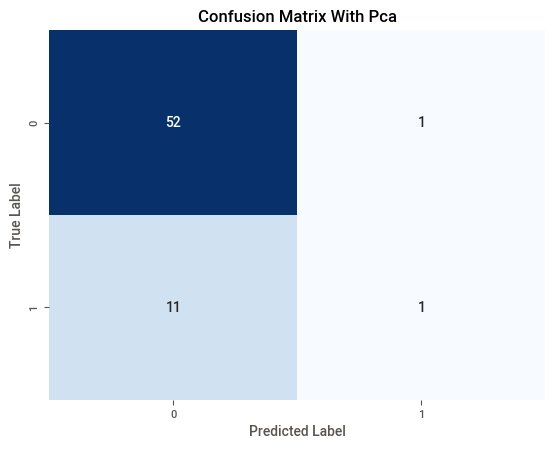

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_pca_test, y_pca_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix With Pca')
plt.show()

## UMAP

In [70]:
features_scaled_noisy = features_scaled + np.random.normal(0, 0.01, features_scaled.shape)

In [73]:
import umap.umap_ as umap
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=1.0,
    eval_metric='logloss'
)

# Definisikan pipeline dengan UMAP dan XGBoost
pipeline_umap = Pipeline([
    ('umap', umap.UMAP()),
    ('xgb', xgb_model)
])

# Definisikan parameter grid untuk UMAP dan XGBoost
param_grid_umap = {
    'umap__n_neighbors': [5, 10, 15, 20],
    'umap__n_components': [2, 5, 10, 12,],
    'umap__min_dist': [0.1, 0.3, 0.5],
    'umap__metric': ['euclidean', 'manhattan'],
}

# Lakukan Grid Search dengan pipeline
grid_search_umap = GridSearchCV(pipeline_umap, param_grid_umap, cv=5)
grid_search_umap.fit(features_scaled, y)
# grid_search_umap.fit(features_scaled_noisy, y)

# Dapatkan parameter terbaik
best_params_umap = grid_search_umap.best_params_
print(f'Best UMAP parameters: {best_params_umap}')

Best UMAP parameters: {'umap__metric': 'manhattan', 'umap__min_dist': 0.5, 'umap__n_components': 12, 'umap__n_neighbors': 5}


In [74]:
import umap.umap_ as umap

# Inisialisasi dan transformasi dengan UMAP
umap_model= umap.UMAP(
    n_neighbors=5,
    n_components=12,
    min_dist=0.5,
    metric='manhattan',
)
features_reduced_umap = umap_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled.shape}')
print(f'UMAP reduced shape: {features_reduced_umap.shape}')

Original shape: (321, 12)
UMAP reduced shape: (321, 12)


## Splitting The Dataset (After Feature Reduced With UMAP)

In [75]:
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(features_reduced_umap, y, test_size=0.2, random_state=42)

In [76]:
print("X_umap_train shape:", X_umap_train.shape)
print("X_umap_test shape:", X_umap_test.shape)
print("y_umap_train shape:", y_umap_train.shape)
print("y_umap_test shape:", y_umap_test.shape)

X_umap_train shape: (256, 12)
X_umap_test shape: (65, 12)
y_umap_train shape: (256,)
y_umap_test shape: (65,)


In [77]:
print("\nX_umap_train sample:")
print(X_umap_train[:1])
print("\nX_umap_test sample:")
print(X_umap_test[:1])
print("\ny_umap_train sample:")
print(y_umap_train[:1])
print("\ny_umap_test sample:")
print(y_umap_test[:1])


X_umap_train sample:
[[6.6443763 7.22172   7.7157197 6.682554  7.19149   2.4034822 3.3240914
  8.159929  5.197275  3.6924539 6.3385706 3.4120667]]

X_umap_test sample:
[[5.2409863 5.874419  8.464862  5.359682  7.4351406 4.4829345 4.0839357
  6.3872685 3.7918386 2.6552324 7.5575747 4.7259316]]

y_umap_train sample:
[0]

y_umap_test sample:
[0]


## Train The Model (After Feature Reduced With UMAP) 

In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_umap = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_umap.fit(X_umap_train, y_umap_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [79]:
y_umap_pred = xgb_model_umap.predict(X_umap_test) 
accuracy = accuracy_score(y_umap_test, y_umap_pred)
precision = precision_score(y_umap_test, y_umap_pred)
recall = recall_score(y_umap_test, y_umap_pred)
f1 = f1_score(y_umap_test, y_umap_pred)

print('XGBoost Model Performance On UMAP Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On UMAP Reduced Dataset
Accuracy: 0.80
Precision: 0.33
Recall: 0.08
F1-score: 0.13


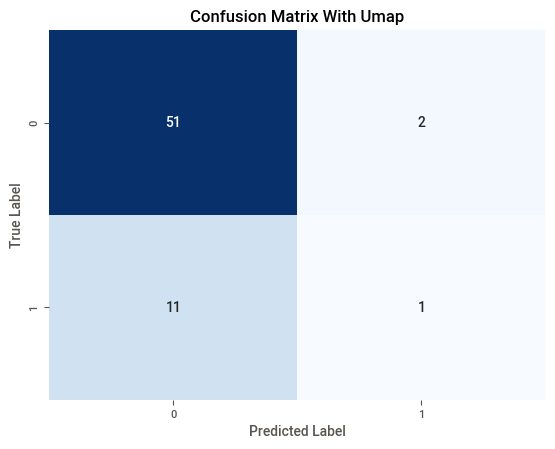

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_umap_test, y_umap_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix With Umap')
plt.show()
